In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Read the CSV file
data = pd.read_csv(r"C:\Users\aman8\Downloads\Exp7_Fish.csv")

In [2]:
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
# Extract features and target variable
X = data.iloc[:, 1:]  # Features (excluding the first column, 'Species')
y = data.iloc[:, 0]   # Target variable (first column, 'Species')

In [4]:
# Encode categorical target variable into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
print(y)
data.head(3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [6]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_pca, y)

SVC(kernel='linear')

In [8]:
# Prepare data for the fish to be classified
fish_to_classify = pd.DataFrame({
    'Weight': [350.0],    # Fill in the weight of the fish to be classified
    'Length1': [25.0],    # Fill in the length1 of the fish to be classified
    'Length2': [27.0],    # Fill in the length2 of the fish to be classified
    'Length3': [31.0],    # Fill in the length3 of the fish to be classified
    'Height': [12.5],     # Fill in the height of the fish to be classified
    'Width': [4.5]        # Fill in the width of the fish to be classified
})


In [9]:
# Reduce dimensionality for visualization using PCA
fish_to_classify_pca = pca.transform(fish_to_classify)

# Use the trained SVM classifier to predict the species of the fish
predicted_species = svm_classifier.predict(fish_to_classify_pca)

In [10]:
# Decode the numerical species label back to the original categorical label
predicted_species_label = label_encoder.inverse_transform(predicted_species)

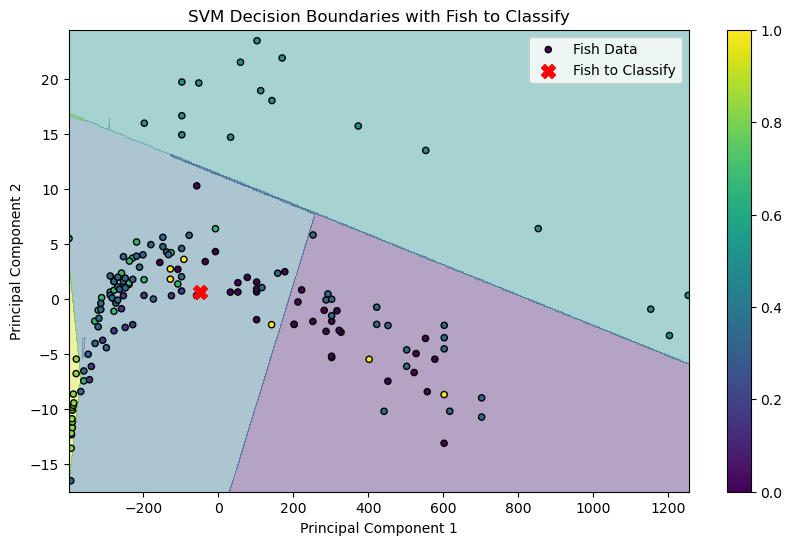

In [11]:
# Plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k', label='Fish Data')
plt.scatter(fish_to_classify_pca[:, 0], fish_to_classify_pca[:, 1], color='red', marker='X', s=100, label='Fish to Classify')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries with Fish to Classify')
plt.legend()
plt.colorbar()
plt.show()

